In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [8]:
from sklearn.decomposition import PCA

## Load data

In [7]:
data = pd.read_csv('./Datasets/Heart_Failure_Prediction/heart_failure_clinical_records_dataset.csv')

In [14]:
print(data.columns, len(data.columns))
data.dtypes
data.notnull().count()
data.describe()

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object') 13


age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

age                         299
anaemia                     299
creatinine_phosphokinase    299
diabetes                    299
ejection_fraction           299
high_blood_pressure         299
platelets                   299
serum_creatinine            299
serum_sodium                299
sex                         299
smoking                     299
time                        299
DEATH_EVENT                 299
dtype: int64

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

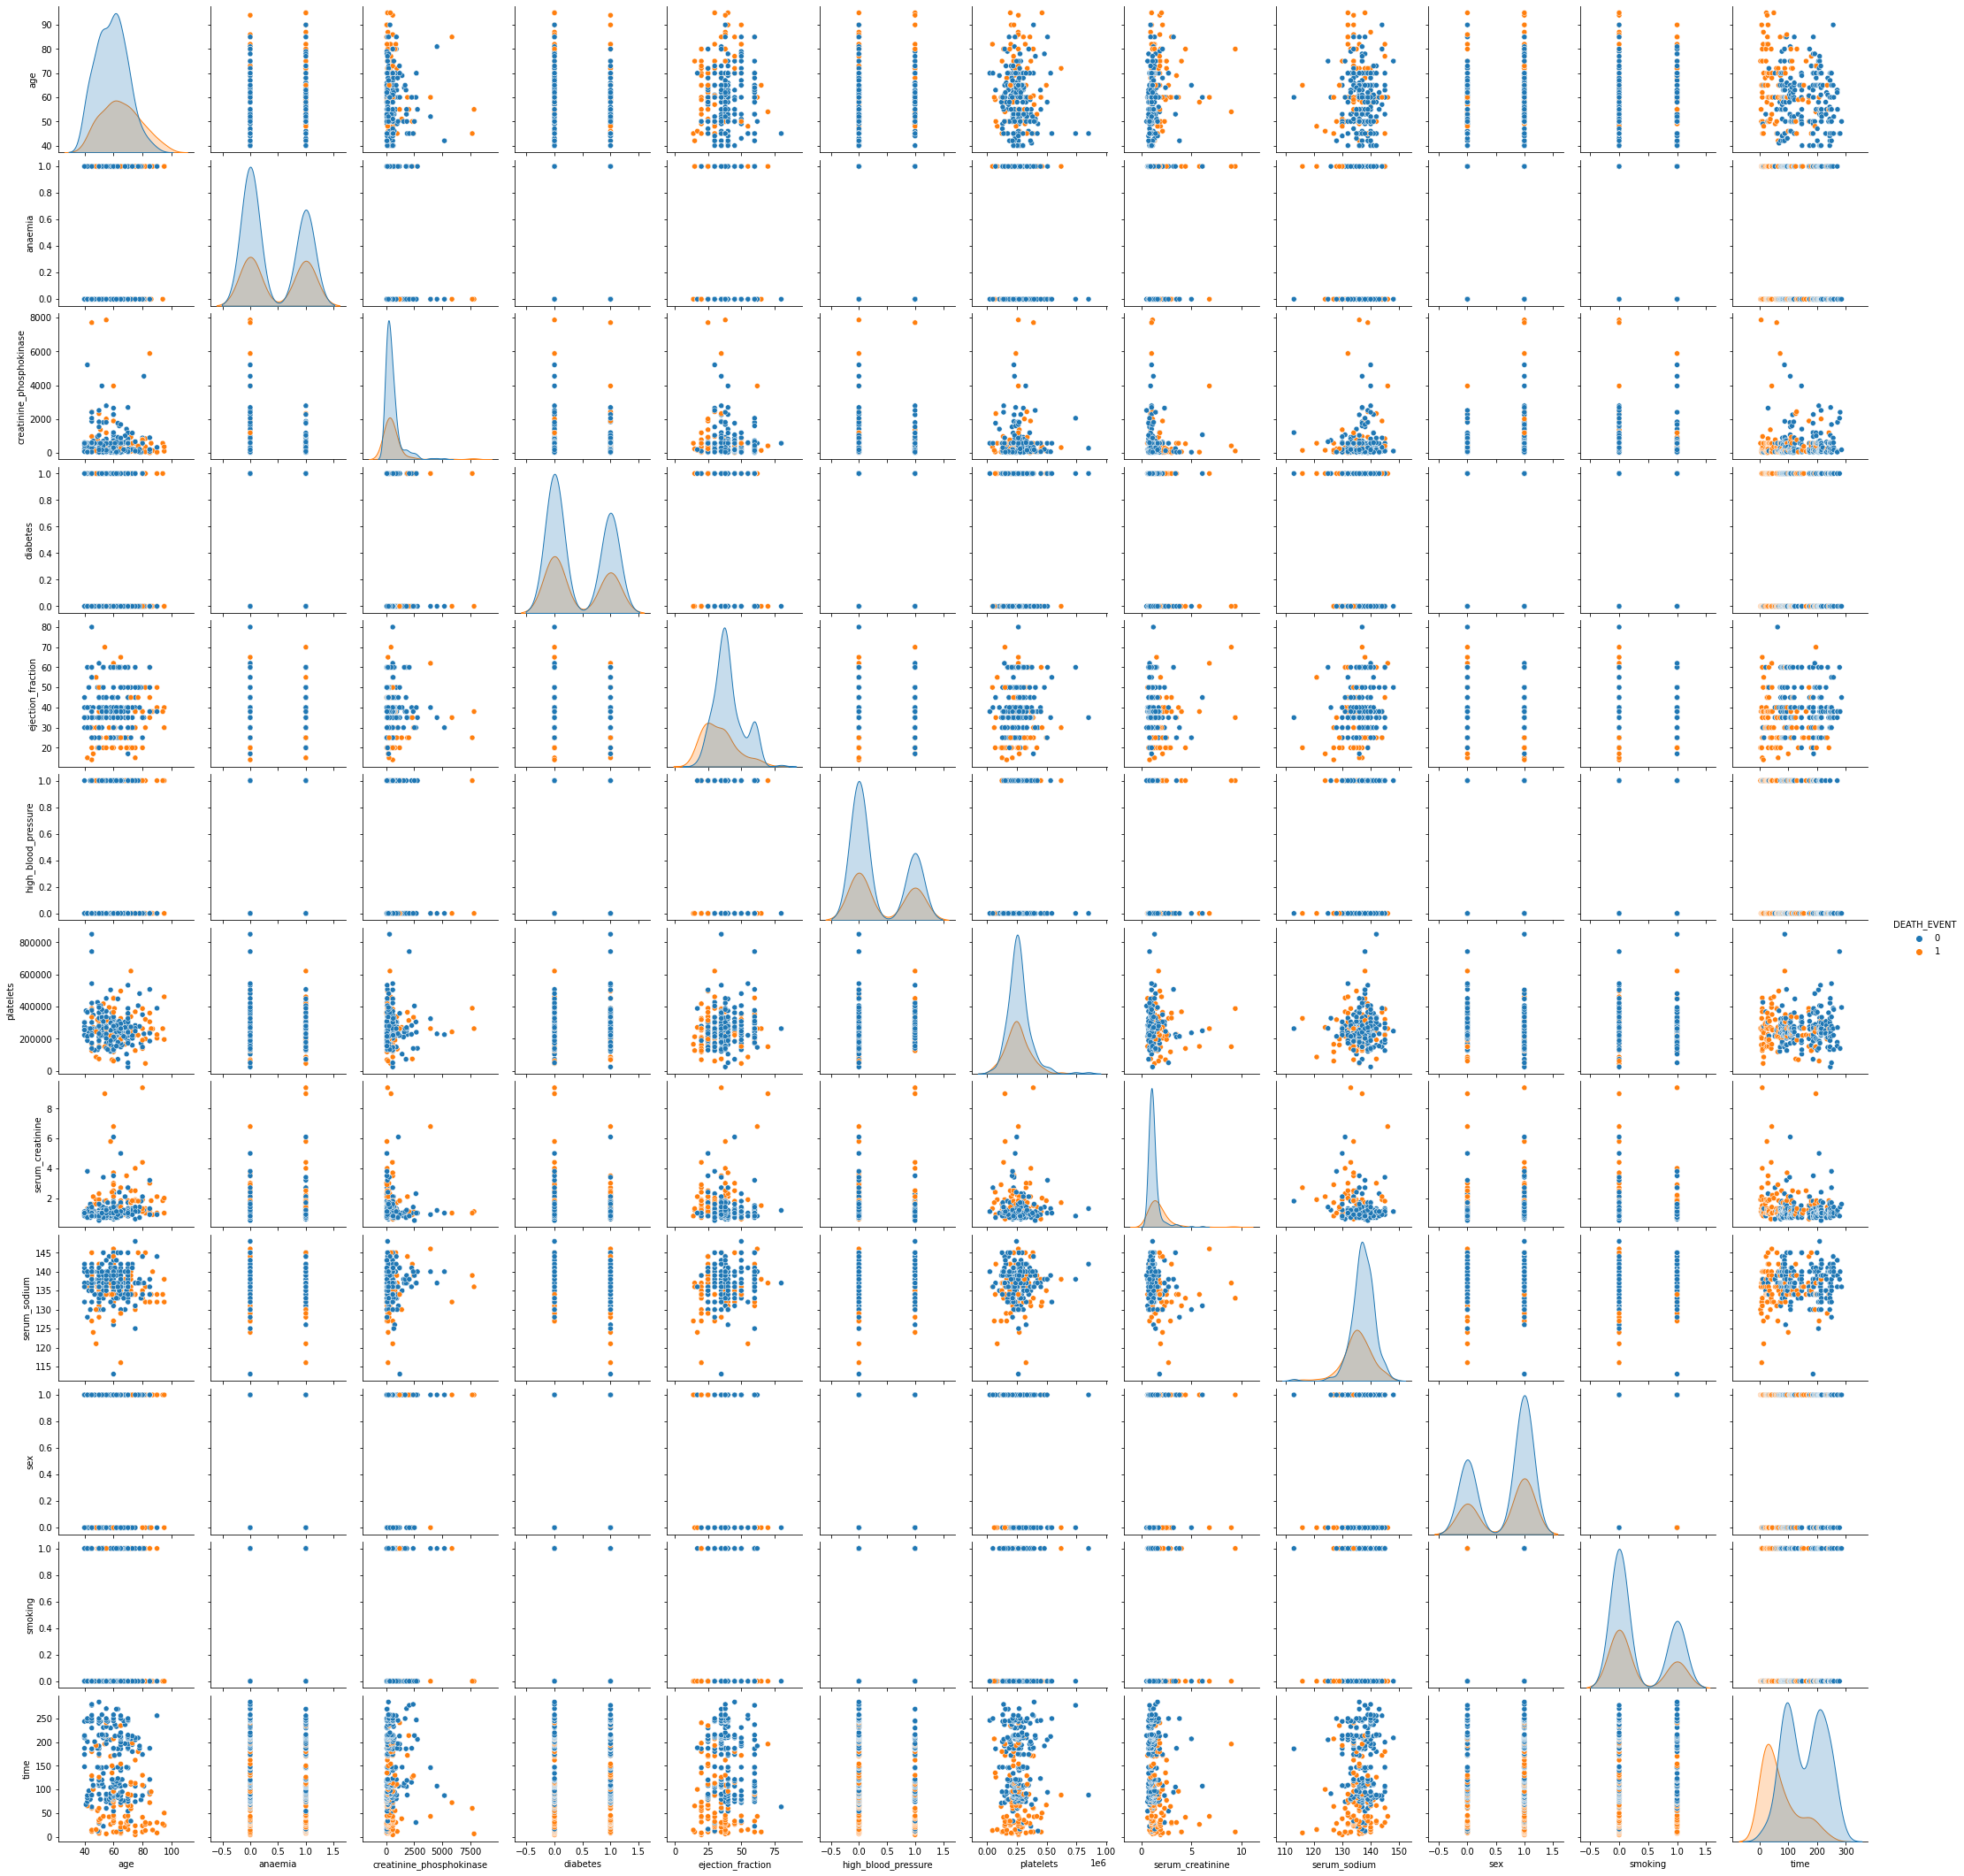

In [9]:
#sns.pairplot(data, hue='DEATH_EVENT')

## Tree classifier 

In [12]:
tree = DecisionTreeClassifier()
col_for_tree = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']
X_train, X_test, Y_train, Y_test = train_test_split(data[col_for_tree], \
                                                    data['DEATH_EVENT'], stratify=data['DEATH_EVENT'])
tree.fit(X_train, Y_train)
tree_prediction = tree.predict(X_test)
print(classification_report(Y_test, tree_prediction))
print(confusion_matrix(Y_test, tree_prediction))

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.93      0.80      0.86        51
           1       0.68      0.88      0.76        24

    accuracy                           0.83        75
   macro avg       0.80      0.84      0.81        75
weighted avg       0.85      0.83      0.83        75

[[41 10]
 [ 3 21]]


<Figure size 3600x3600 with 0 Axes>

[Text(1130.625, 2582.1, 'X[11] <= 67.5\ngini = 0.436\nsamples = 224\nvalue = [152, 72]\nclass = y[0]'),
 Text(360.0, 2310.3, 'X[7] <= 0.85\ngini = 0.241\nsamples = 50\nvalue = [7, 43]\nclass = y[1]'),
 Text(180.0, 2038.5, 'X[4] <= 39.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = y[0]'),
 Text(90.0, 1766.6999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = y[1]'),
 Text(270.0, 1766.6999999999998, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = y[0]'),
 Text(540.0, 2038.5, 'X[2] <= 159.5\ngini = 0.19\nsamples = 47\nvalue = [5, 42]\nclass = y[1]'),
 Text(450.0, 1766.6999999999998, 'X[0] <= 56.5\ngini = 0.34\nsamples = 23\nvalue = [5, 18]\nclass = y[1]'),
 Text(270.0, 1494.8999999999999, 'X[4] <= 25.0\ngini = 0.48\nsamples = 5\nvalue = [3, 2]\nclass = y[0]'),
 Text(180.0, 1223.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = y[1]'),
 Text(360.0, 1223.1, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = y[0]'),
 Text(630.0, 1494.8999999999999, 'X[11] <= 31.0\ngini 

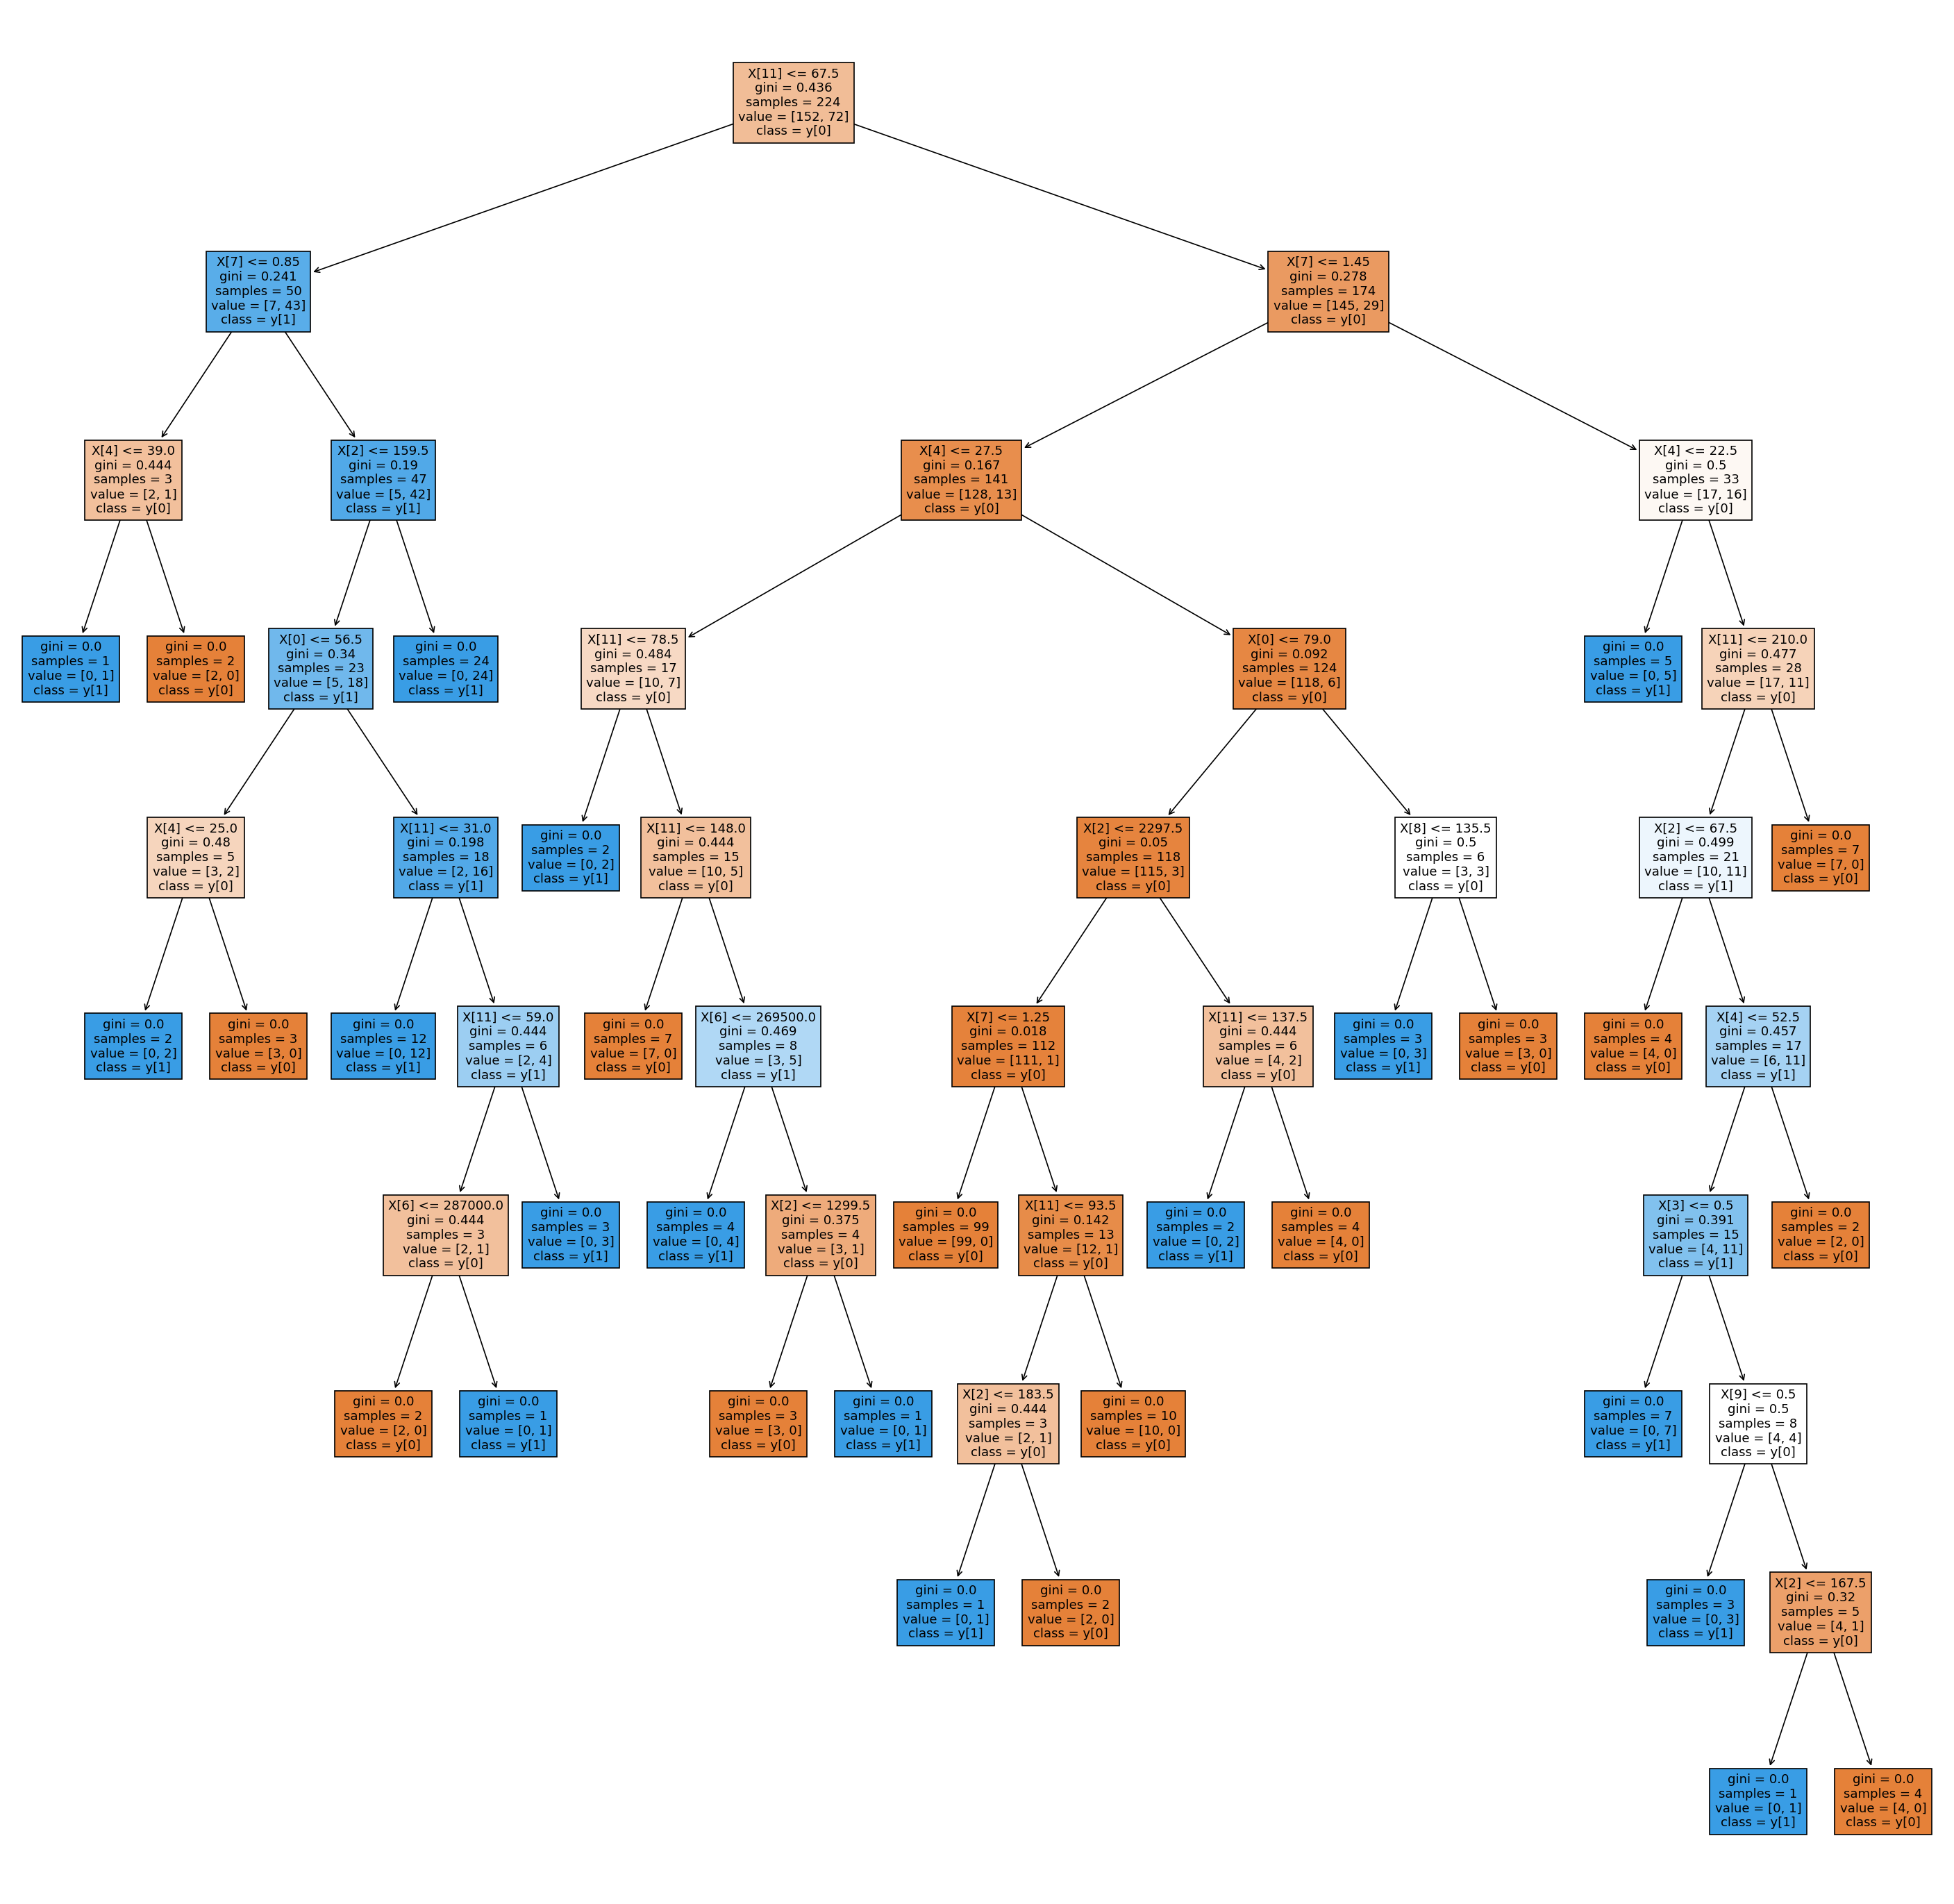

In [13]:
plt.figure(figsize=(30, 30), dpi= 120)
plot_tree(tree, filled=True, class_names=True)

In [14]:
for i in np.argsort(tree.feature_importances_):
    print(col_for_tree[i], '--->', tree.feature_importances_[i])

anaemia ---> 0.0
high_blood_pressure ---> 0.0
smoking ---> 0.0
diabetes ---> 0.019103313840155945
sex ---> 0.02456140350877194
serum_sodium ---> 0.030701754385964918
platelets ---> 0.036671539961013654
age ---> 0.0454634507133049
creatinine_phosphokinase ---> 0.09674684942554014
serum_creatinine ---> 0.10389610239414271
ejection_fraction ---> 0.13004512090439754
time ---> 0.5128104648667083


## Tree classifier 
### without zero-importance feature

In [19]:
tree = DecisionTreeClassifier()
col_for_tree = ['age', 'creatinine_phosphokinase',
       'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time']
X_train, X_test, Y_train, Y_test = train_test_split(data[col_for_tree], \
                                                    data['DEATH_EVENT'], stratify=data['DEATH_EVENT'])
tree.fit(X_train, Y_train)
tree_prediction = tree.predict(X_test)
print(classification_report(Y_test, tree_prediction))
print(confusion_matrix(Y_test, tree_prediction))
for i in np.argsort(tree.feature_importances_):
    print(col_for_tree[i], '--->', tree.feature_importances_[i])

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.81      0.69      0.74        51
           1       0.50      0.67      0.57        24

    accuracy                           0.68        75
   macro avg       0.66      0.68      0.66        75
weighted avg       0.71      0.68      0.69        75

[[35 16]
 [ 8 16]]
serum_sodium ---> 0.018421052631578953
platelets ---> 0.0837010455431508
age ---> 0.08740982322853671
creatinine_phosphokinase ---> 0.10831769162619499
ejection_fraction ---> 0.12073372998951563
serum_creatinine ---> 0.1375267731084988
time ---> 0.44388988387252415


## tree classifier with PCA

In [42]:
columns = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',]
X_train, X_test, Y_train, Y_test = train_test_split(data[columns], 
        data['DEATH_EVENT'], stratify=data['DEATH_EVENT'], test_size=0.3)
pca = PCA(n_components=(len(columns)-2)) 

pca_X_train = pca.fit_transform(X_train)  
pca_X_test = pca.transform(X_test)
#print(pca.explained_variance_ratio_, '\n'+20*'#') #роцент дисперсии, который объясняет каждая компонента
#print(pca.components_, '\n'+20*'#')#какой вклад вносят признаки в компоненты
#print(pca.singular_values_, '\n'+20*'#')

tree = DecisionTreeClassifier()
tree.fit(pca_X_train, Y_train)
tree_prediction = tree.predict(pca_X_test)
print(classification_report(Y_test, tree_prediction))
print(confusion_matrix(Y_test, tree_prediction))

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.87      0.90      0.89        61
           1       0.78      0.72      0.75        29

    accuracy                           0.84        90
   macro avg       0.83      0.81      0.82        90
weighted avg       0.84      0.84      0.84        90

[[55  6]
 [ 8 21]]


<Figure size 3600x3600 with 0 Axes>

[Text(900.9375, 2567.0, 'X[2] <= -72.438\ngini = 0.436\nsamples = 209\nvalue = [142, 67]\nclass = y[0]'),
 Text(279.0, 2265.0, 'X[5] <= -1.157\ngini = 0.201\nsamples = 44\nvalue = [5, 39]\nclass = y[1]'),
 Text(186.0, 1963.0, 'X[5] <= -2.725\ngini = 0.415\nsamples = 17\nvalue = [5, 12]\nclass = y[1]'),
 Text(93.0, 1661.0, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]\nclass = y[1]'),
 Text(279.0, 1661.0, 'X[8] <= 0.379\ngini = 0.494\nsamples = 9\nvalue = [5, 4]\nclass = y[0]'),
 Text(186.0, 1359.0, 'X[2] <= -118.079\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = y[0]'),
 Text(93.0, 1057.0, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = y[1]'),
 Text(279.0, 1057.0, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = y[0]'),
 Text(372.0, 1359.0, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = y[1]'),
 Text(372.0, 1963.0, 'gini = 0.0\nsamples = 27\nvalue = [0, 27]\nclass = y[1]'),
 Text(1522.875, 2265.0, 'X[4] <= -9.937\ngini = 0.282\nsamples = 165\nvalue = [137, 28]\nclass = y[0]'),
 

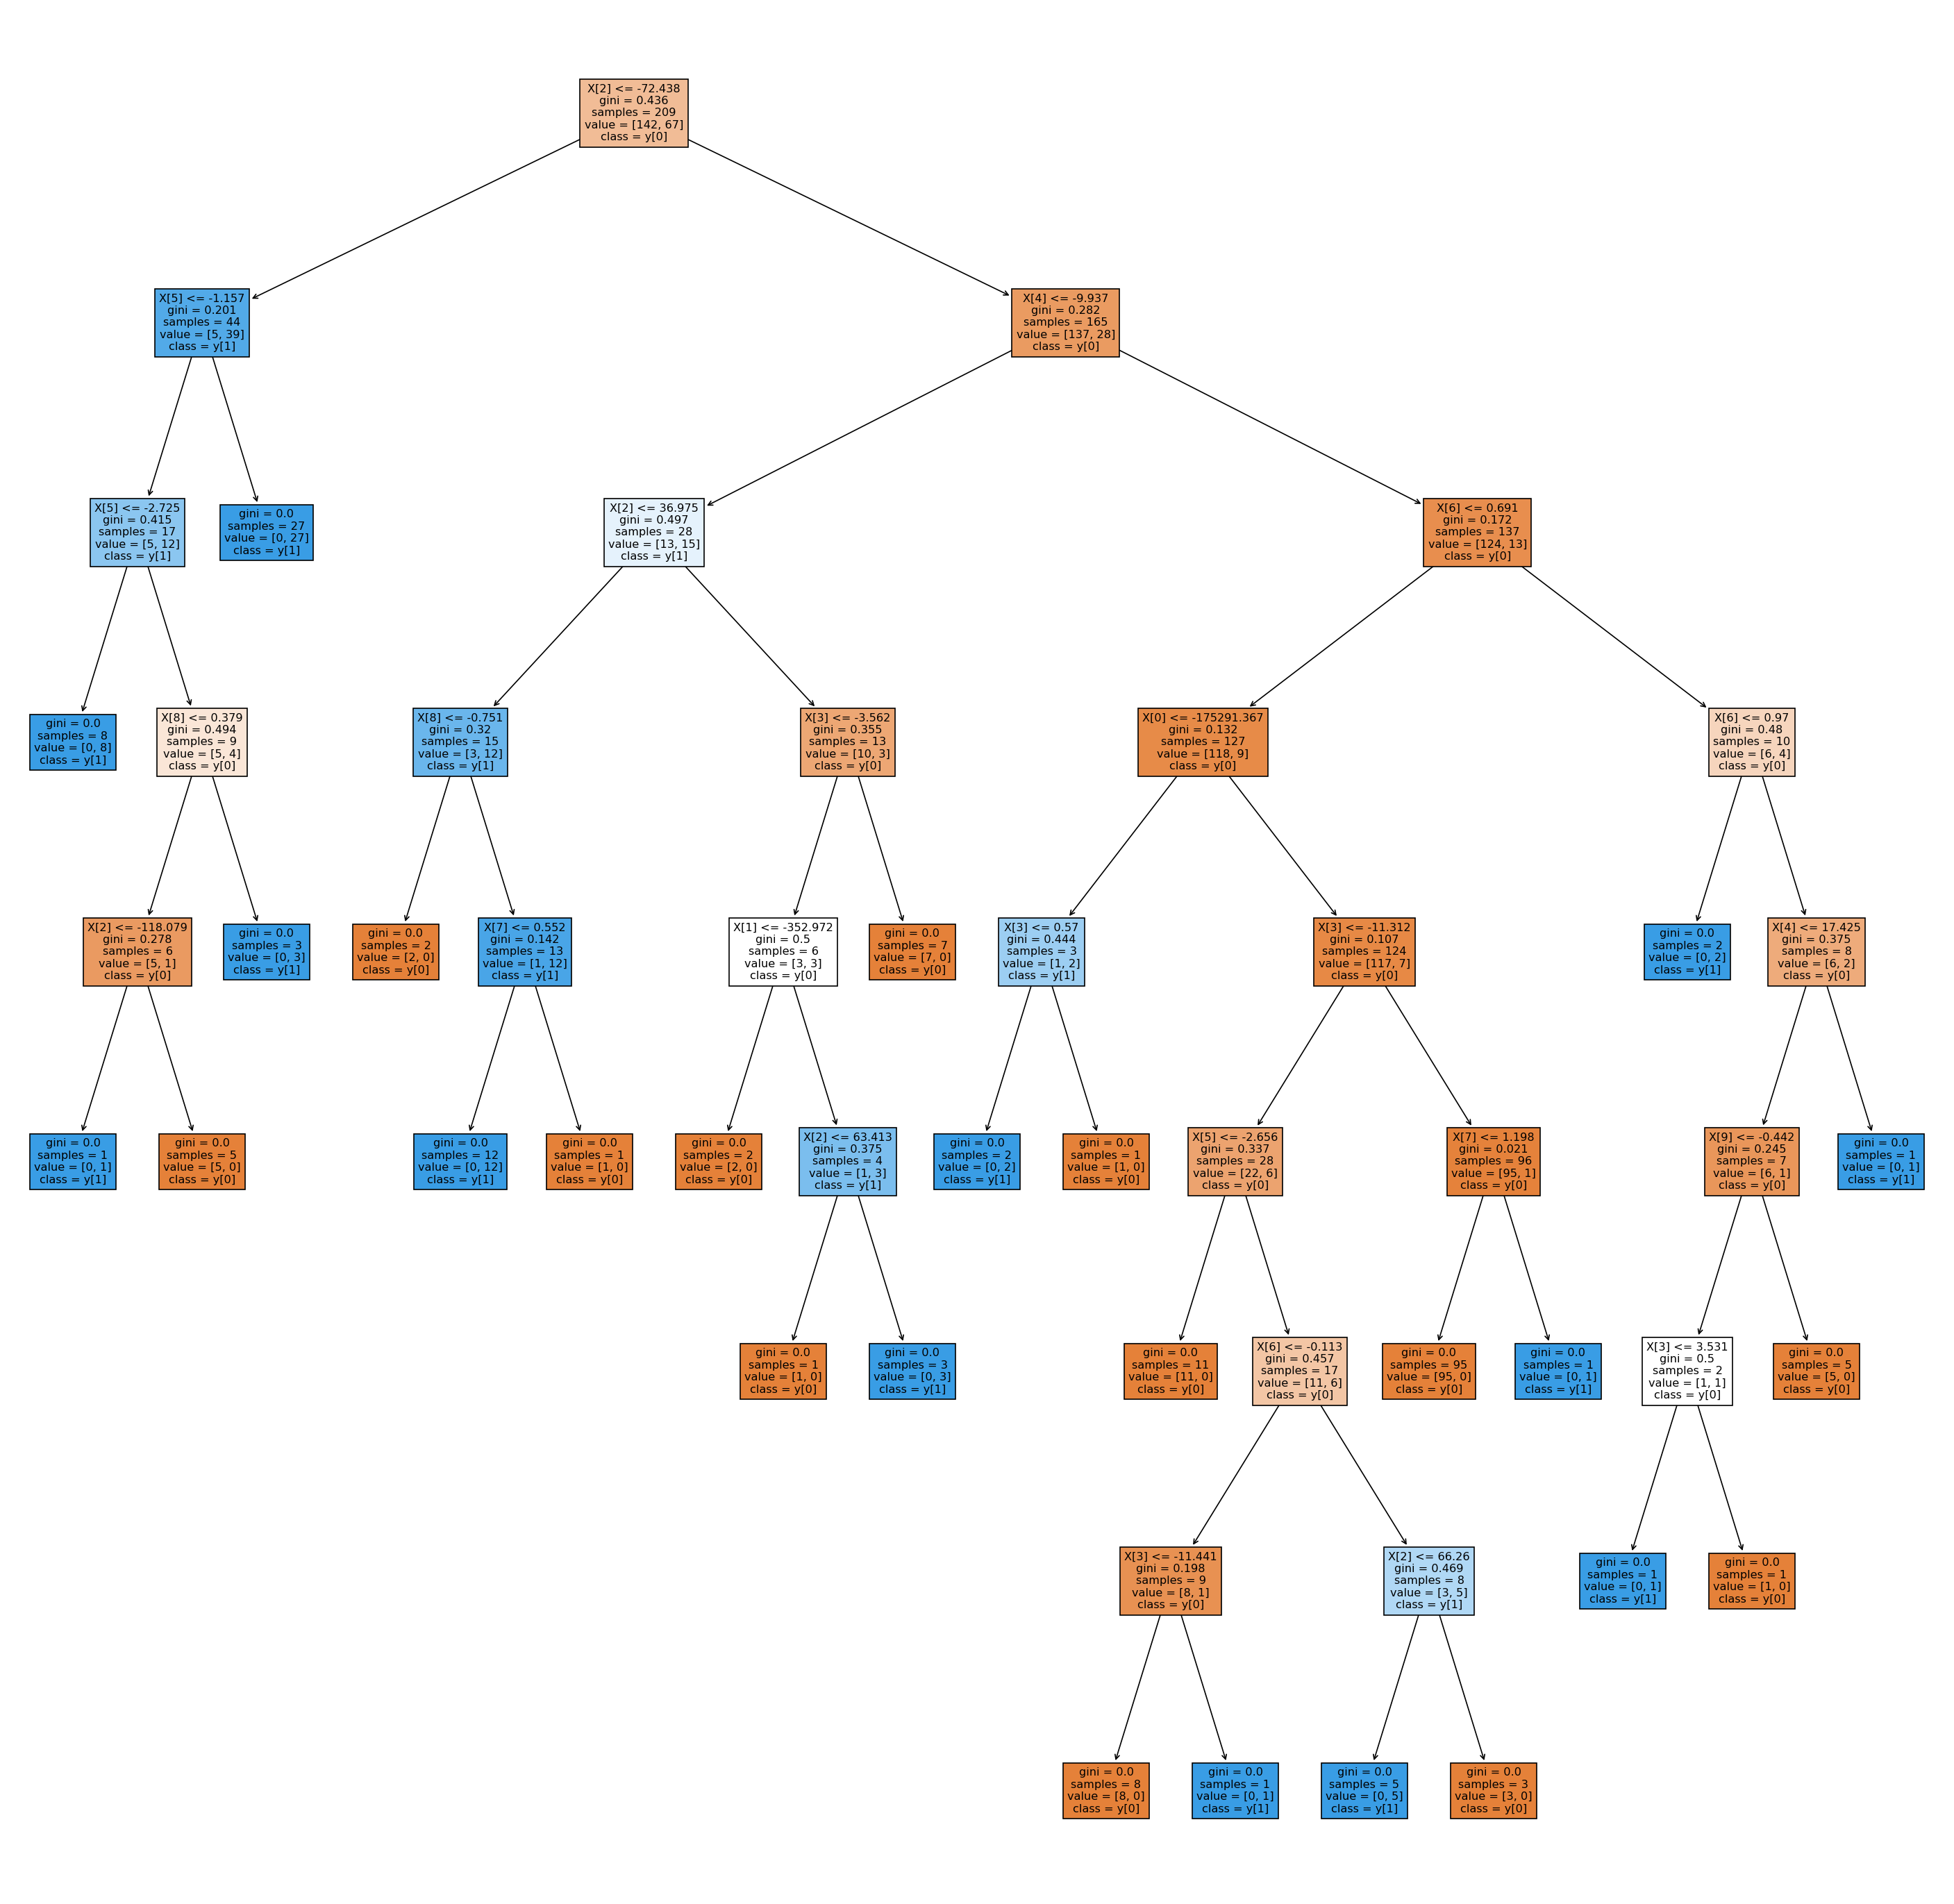

In [43]:
plt.figure(figsize=(30, 30), dpi= 120)
plot_tree(tree, filled=True, class_names=True)